## Homework 1 - Md Karim Uddin 


# Task1



#### Task 1 (5 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained scores as a function of the chosen parameter. Plot the coefficient magnitudes for the best obtained model. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import RandomizedSearchCV as RandomCV

In [3]:
df = pd.read_csv('train.csv')

df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
df.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

In [5]:
my_list = list(df)

print (my_list)

['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

<AxesSubplot: >

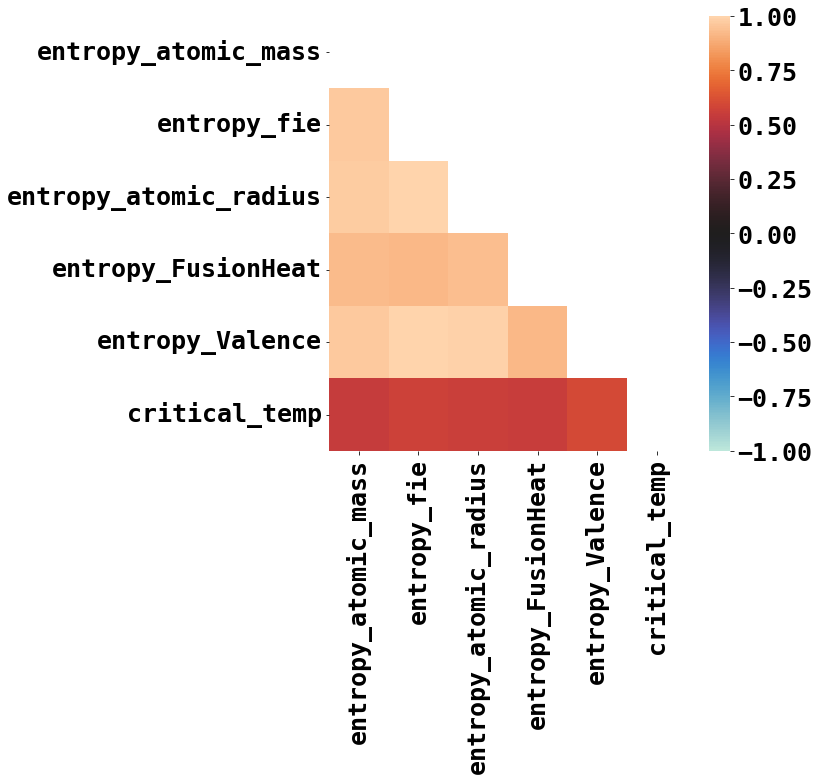

In [6]:
selected_features = ['entropy_atomic_mass', 'entropy_fie', 'entropy_atomic_radius', 
                     'entropy_FusionHeat', 'entropy_Valence', 'critical_temp']
df1 = df[selected_features]

plt.figure(figsize=(8,8))

corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='icefire')

<AxesSubplot: >

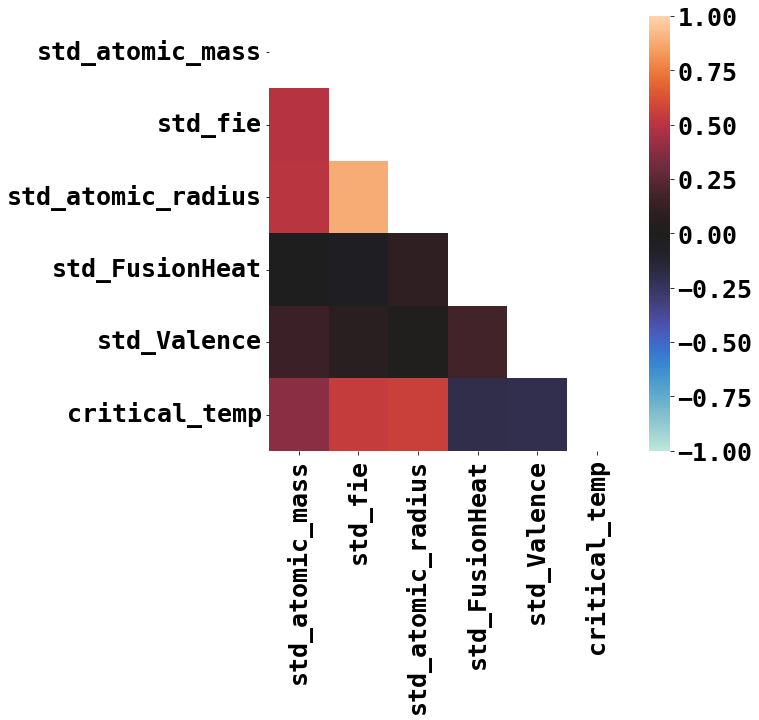

In [7]:
selected_features = ['std_atomic_mass', 'std_fie', 'std_atomic_radius', 
                     'std_FusionHeat', 'std_Valence', 'critical_temp']
df2 = df[selected_features]

plt.figure(figsize=(8,8))

corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='icefire')

<AxesSubplot: >

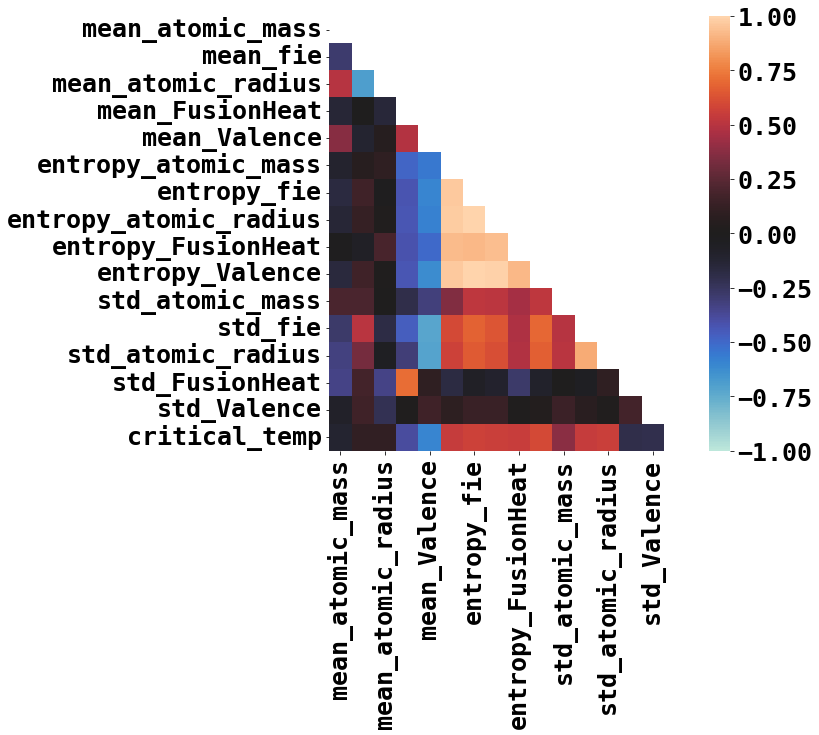

In [8]:
selected_features = ['mean_atomic_mass', 'mean_fie', 'mean_atomic_radius', 
                     'mean_FusionHeat', 'mean_Valence',
                                          'entropy_atomic_mass', 'entropy_fie', 'entropy_atomic_radius', 
                     'entropy_FusionHeat', 'entropy_Valence','std_atomic_mass', 'std_fie', 'std_atomic_radius', 
                     'std_FusionHeat', 'std_Valence', 'critical_temp']
df3 = df[selected_features]

plt.figure(figsize=(8,8))

corr = df3.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='icefire')

In [9]:
# Separate predictors and target
X = df.iloc[:,1:21]
y = df.iloc[:,-1]

In [10]:
X

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425000,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425000,1010.544286,718.152900,938.512777,1.305967,0.783207,810.6,739.575000,323.811808,355.183884
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,775.425000,1009.717143,718.152900,937.025573,1.305967,0.805230,810.6,728.807143,323.811808,356.319281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,661.775000,753.793333,651.611213,750.570867,1.371139,0.927050,273.0,427.546667,114.383355,64.428777
21259,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,747.780000,989.819048,702.115184,923.426093,1.541006,0.988470,810.6,659.771429,293.286136,345.450969
21260,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,733.550000,691.580000,730.207231,689.480961,0.688594,0.542120,139.9,370.180000,69.950000,55.960000
21261,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,733.550000,706.969000,730.207231,704.143255,0.688594,0.648876,139.9,208.799000,69.950000,64.702805


## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.54
Test set score: 0.53


## KNeighbors Regressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=10)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [13]:
print("Train set R^2: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Train set R^2: 0.89
Test set R^2: 0.86


## Ridge

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
#Ridge?

Training set score: 0.54
Test set score: 0.53


In [15]:
ridge10 = Ridge(alpha=100).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.53


In [16]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.54
Test set score: 0.53


In [17]:
ridge10 = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.54
Test set score: 0.53


In [18]:
ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.54
Test set score: 0.53


## Lasso

In [19]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lasso = Lasso(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.51
Test set score: 0.50
Number of features used: 15


In [20]:
lasso001 = Lasso(alpha=100, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.42
Test set score: 0.40
Number of features used: 5


In [21]:
lasso001 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.50
Test set score: 0.49
Number of features used: 10


In [22]:
lasso001 = Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.51
Test set score: 0.50
Number of features used: 15


In [23]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.54
Test set score: 0.53
Number of features used: 19


In [24]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.54
Test set score: 0.53
Number of features used: 20


### Conclusion
We can see that from the models used, KNN is the best model among them 

# Task2

#### Task 2 (10 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Never Used" and "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Never Used", "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Never Used", "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score



In [26]:
data = pd.read_csv('Drug_Consumption.csv')
data = data.drop('ID', axis=1)
data

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [27]:
# Check for missing values
data.isna().sum().sum()

0

In [28]:
data.dtypes

Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [29]:
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')

Original shape of data with 1884 rows and 31 columns


In [30]:
# Overclaimers
data.query("Semer != 'CL0'")

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
726,25-34,F,Left school at 16 years,Australia,White,-0.58016,0.32197,0.14143,-0.60633,0.12331,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
816,18-24,M,"Some college or university, no certificate or ...",Australia,Asian,-0.67825,1.74091,0.72330,0.13136,0.41594,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1515,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1532,18-24,F,"Some college or university, no certificate or ...",USA,Other,-0.46725,0.80523,0.29338,2.03972,1.81175,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1697,35-44,F,University degree,USA,White,1.98437,-0.80615,2.15324,0.76096,-0.00665,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1768,18-24,M,Left school at 18 years,USA,Mixed-White/Black,-0.34799,1.28610,1.06238,-0.01729,-0.52745,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1805,18-24,F,Left school at 17 years,USA,White,1.23461,1.11406,1.06238,-1.47955,0.12331,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1822,18-24,F,University degree,USA,White,0.22393,-0.30033,0.88309,1.28610,-0.00665,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [31]:
# We will drop overclaimers since, there answers might not truly be accurate
data = data.drop(data[data['Semer'] != 'CL0'].index)

# We will also drop unnecesary columns
data = data.drop(['Choc','Semer'], axis=1)
data = data.reset_index(drop=True)

In [32]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


In [33]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

In [34]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7

In [35]:
for column in drugs:
    data[column] = data[column].apply(drug_encoder)

In [36]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,0,7,0


<AxesSubplot: >

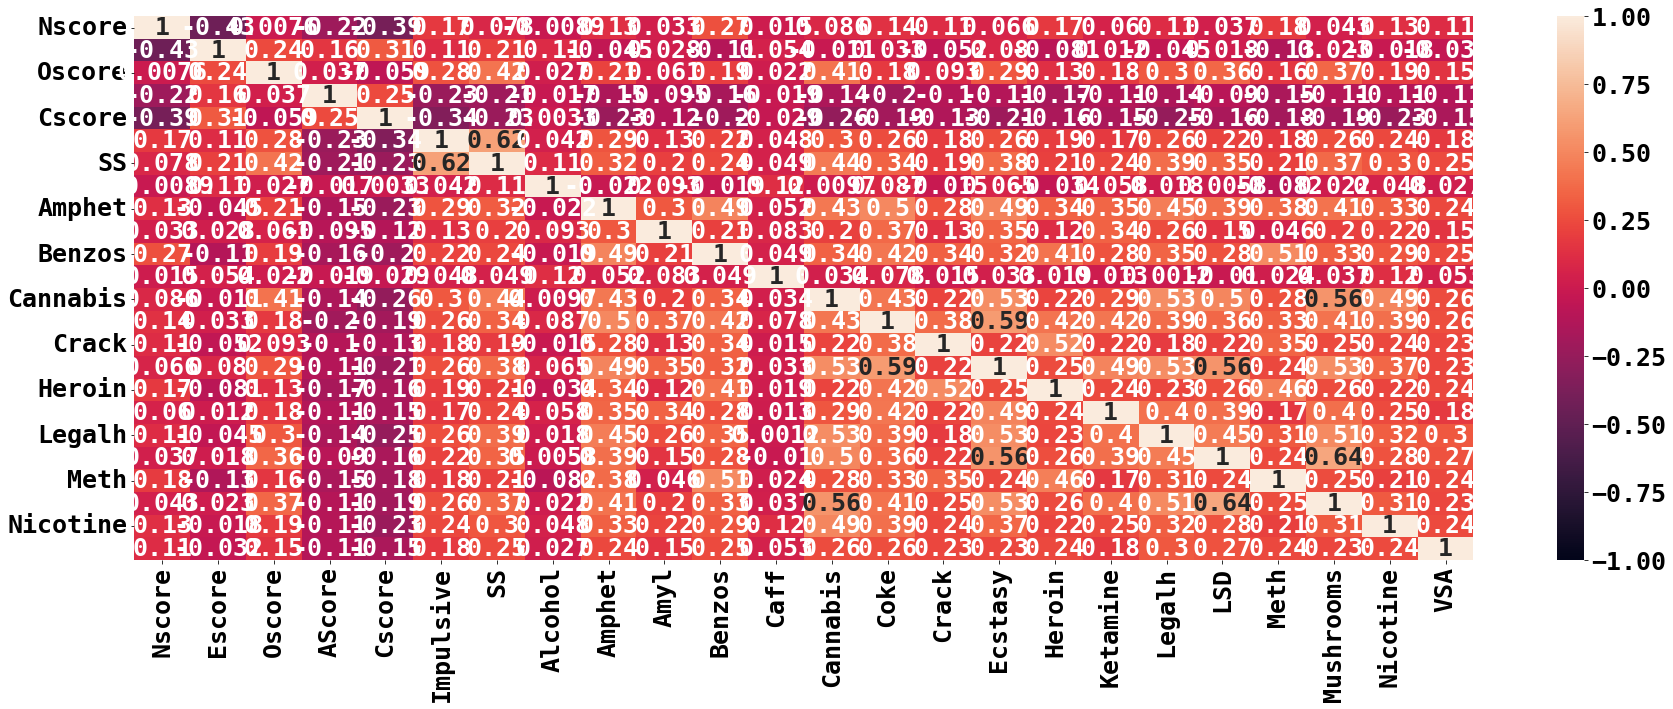

In [37]:
corr = data.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [38]:
df= data

In [39]:
df= df.drop(['Age', 'Gender', 'Education','Country','Education','Ethnicity'], axis=1)


In [40]:
df.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,...,0,4,0,2,0,2,3,0,4,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,...,0,0,0,2,0,0,0,0,2,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,...,0,1,0,0,1,0,0,2,2,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,...,0,0,0,0,0,0,0,0,7,0


In [41]:
df.iloc[:,:7]

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [42]:
y_alc = df.iloc[:,7].values

y_alc

array([6, 7, 4, ..., 4, 6, 4], dtype=int64)

In [43]:
y_amp = df.iloc[:,8].values

y_amp

array([2, 0, 0, ..., 7, 0, 3], dtype=int64)

In [44]:
df.iloc[:,:7]

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [45]:


# Split df into X and y
X = df.iloc[:,:7].values  
y_alc = df.iloc[:,7].values#Alcohol
y_amp = df.iloc[:,8].values#Amphetamine

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
    
X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)

In [46]:

# Split df into X and y
X = df.iloc[:,:7].values  
y_alc = df.iloc[:,7].values#Alcohol
y_amp = df.iloc[:,8].values#Amphetamine

In [47]:
df.dtypes

Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int64
Amphet         int64
Amyl           int64
Benzos         int64
Caff           int64
Cannabis       int64
Coke           int64
Crack          int64
Ecstasy        int64
Heroin         int64
Ketamine       int64
Legalh         int64
LSD            int64
Meth           int64
Mushrooms      int64
Nicotine       int64
VSA            int64
dtype: object

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC



# Split df into X and y
X = df.iloc[:,:7].values  
y_alc = df.iloc[:,7].values#Alcohol
y_amp = df.iloc[:,8].values#Amphetamine
y_amyl = df.iloc[:,9].values#Amyl
y_Ben = df.iloc[:,10].values#Benzos
y_Caff = df.iloc[:,11].values#Caff
y_Can = df.iloc[:,12].values#Cannabis
y_Coke = df.iloc[:,13].values#Coke
y_Crack = df.iloc[:,14].values#Crack
y_Ecstasy = df.iloc[:,15].values#Ecstasy
y_Heroin = df.iloc[:,16].values#Heroin
y_Ketamine = df.iloc[:,17].values#Ketamine
y_Leg = df.iloc[:,18].values#Legalh
y_LSD = df.iloc[:,19].values#LSD
y_Meth = df.iloc[:,20].values#Meth
y_Mush = df.iloc[:,21].values#Mushrooms
y_Nic = df.iloc[:,22].values#Nicotine


X_train, X_test, y_train, y_test = train_test_split(X, y_alc, random_state=42)
#logreg = LogisticRegression().fit(X_train, y_train)
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.407
Test set score: 0.399


# Multiclass Classification

## Alcohol

In [49]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X,y_alc).predict(X)

print("Number of mislabeled points out of a total {} points : {}".format(X.shape[0],(y_alc != y_pred).sum()))

Number of mislabeled points out of a total 1876 points : 1133


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y_alc, random_state=42)
gnb_fit = gnb.fit(X_train, y_train)
print("Training set score: {:.3f}".format(gnb_fit.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gnb_fit.score(X_test, y_test)))

Training set score: 0.407
Test set score: 0.403


In [51]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y_alc, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.341


In [52]:
names = list(df.columns)
print(names)
X_names = names[:7]
print(X_names)

['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']
['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']


In [53]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_names)
    plt.title('Feature importance for Drug consumption')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

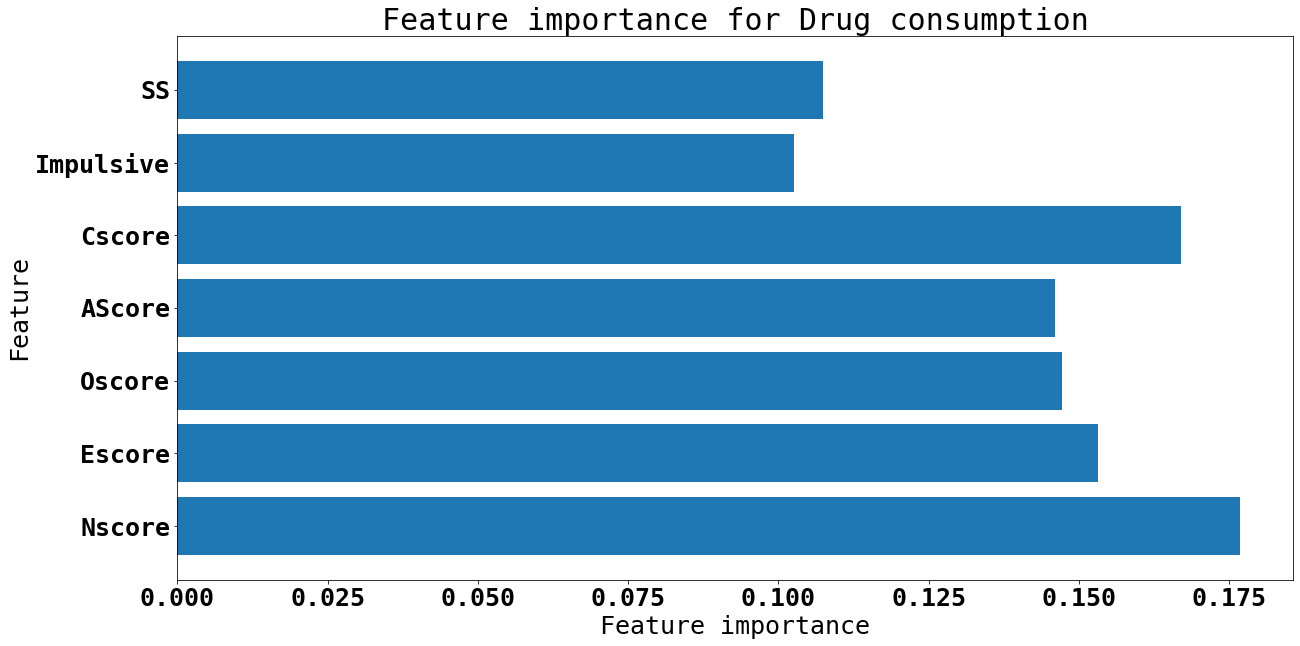

In [54]:
# Feature Importance for Random Forest
plot_feature_importances(forest)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y_alc, random_state=42)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.657
Accuracy on test set: 0.375


In [56]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.839
Accuracy on test set: 0.365


In [57]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.441
Accuracy on test set: 0.399


In [58]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.657
Accuracy on test set: 0.375


In [59]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.305


In [60]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=10)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.190
Accuracy on test set: 0.158


In [61]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=100)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.163
Accuracy on test set: 0.162


In [62]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.001)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.403
Accuracy on test set: 0.405


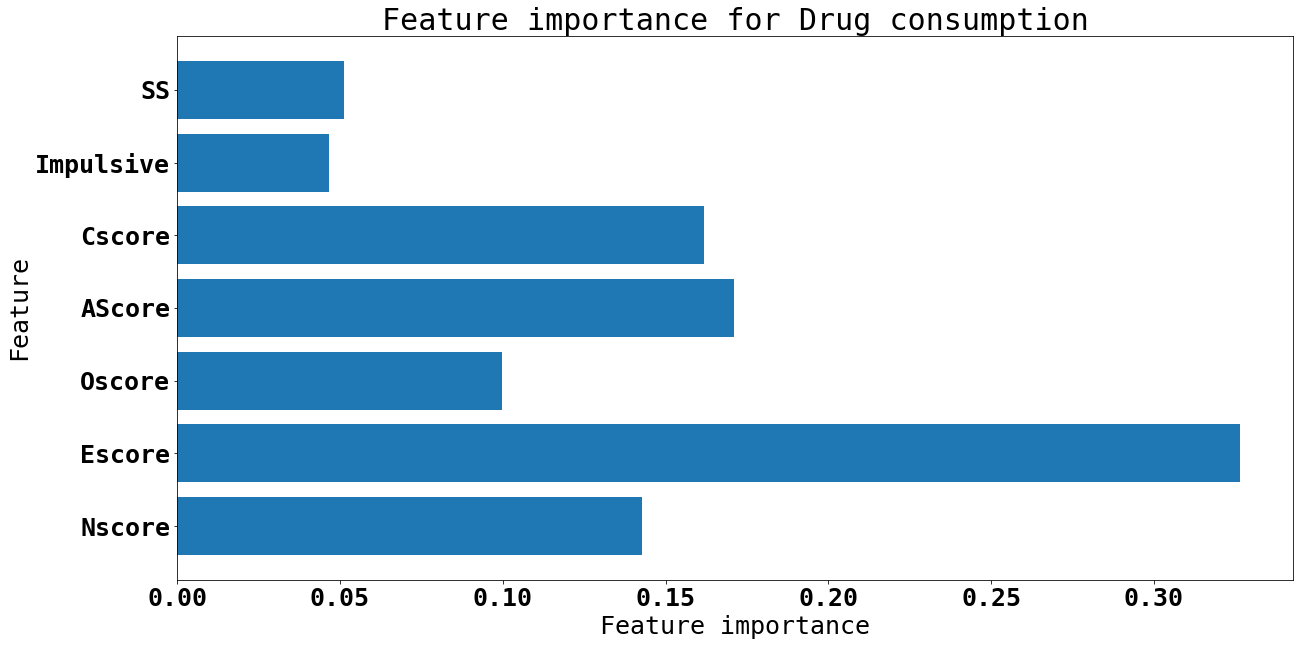

In [63]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances(gbrt)

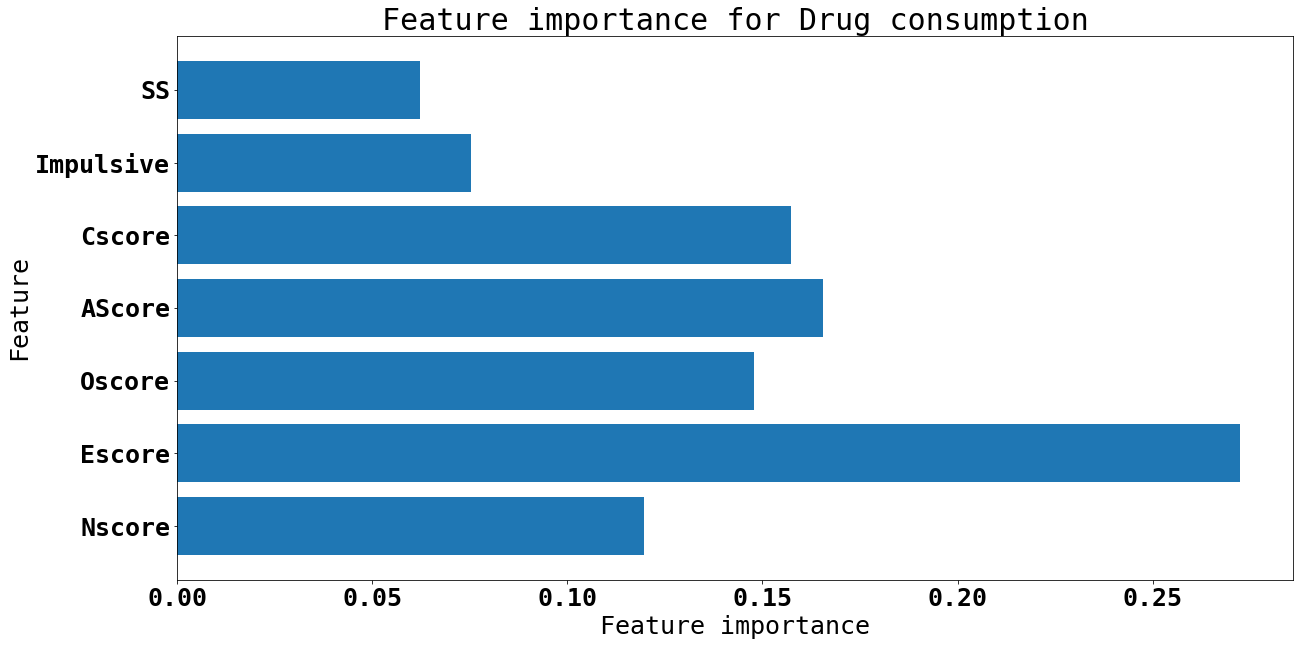

In [64]:
gbrt001 = GradientBoostingClassifier(random_state=0, learning_rate=0.001)
gbrt001.fit(X_train, y_train)

plot_feature_importances(gbrt001)

After manual optimization for one of the default parameters (5 different values of learning ) for GradientBoostingClassifier models make changes to the coefficients of the different features

## Amphetamine 

In [65]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X,y_amp).predict(X)

print("Number of mislabeled points out of a total {} points : {}".format(X.shape[0],(y_alc != y_pred).sum()))

Number of mislabeled points out of a total 1876 points : 1790


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y_amp, random_state=42)
gnb_fit = gnb.fit(X_train, y_train)
print("Training set score: {:.3f}".format(gnb_fit.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gnb_fit.score(X_test, y_test)))

Training set score: 0.494
Test set score: 0.499


In [67]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest1 = RandomForestClassifier(n_estimators=10, random_state=0)
forest1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest1.score(X_test, y_test)))

Accuracy on training set: 0.977
Accuracy on test set: 0.473


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest = RandomForestClassifier(n_estimators=15, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.488


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest = RandomForestClassifier(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.501


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest = RandomForestClassifier(n_estimators=30, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.499


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.495


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.499


In [73]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_names)
    plt.title('Feature importance for Drug consumption')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

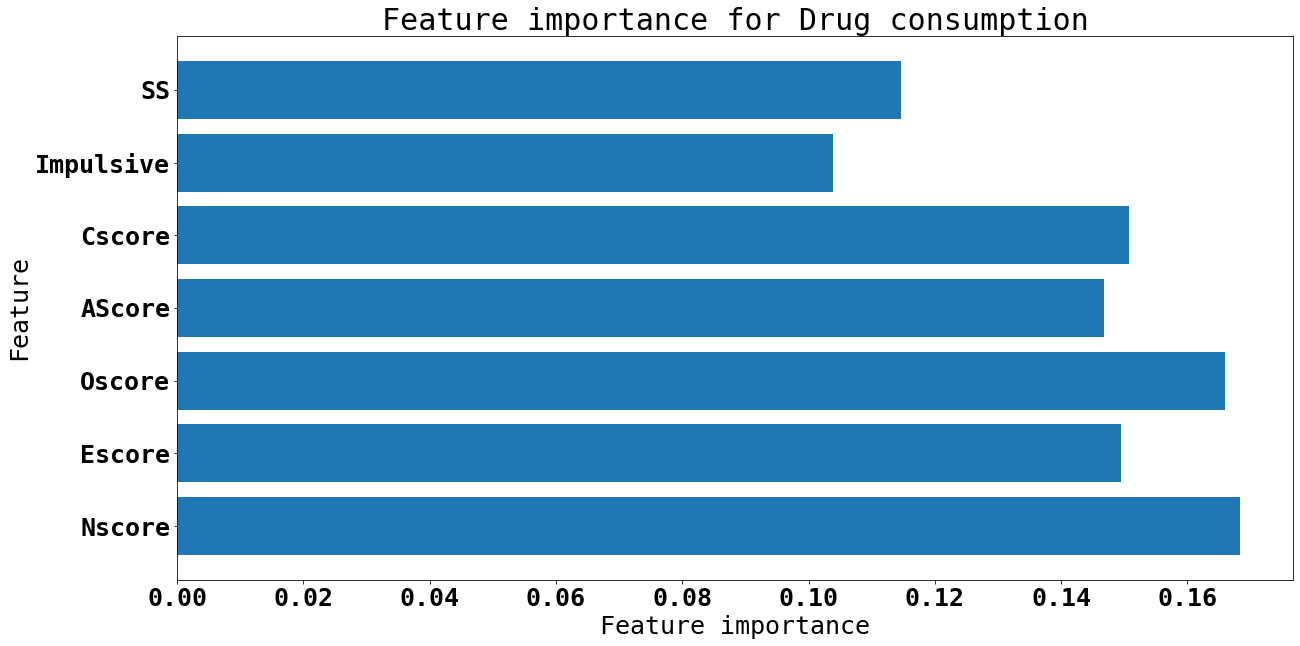

In [74]:
# Feature Importance for Random Forest
plot_feature_importances(forest1)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y_amp, random_state=42)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.724
Accuracy on test set: 0.484


In [76]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.878
Accuracy on test set: 0.467


In [77]:
gbrt001 = GradientBoostingClassifier(random_state=0, learning_rate=0.001)
gbrt001.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt001.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt001.score(X_test, y_test)))

Accuracy on training set: 0.510
Accuracy on test set: 0.544


In [78]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.537
Accuracy on test set: 0.542


In [79]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.724
Accuracy on test set: 0.484


In [80]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=10)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.045
Accuracy on test set: 0.038


In [81]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=100)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.072
Accuracy on test set: 0.079


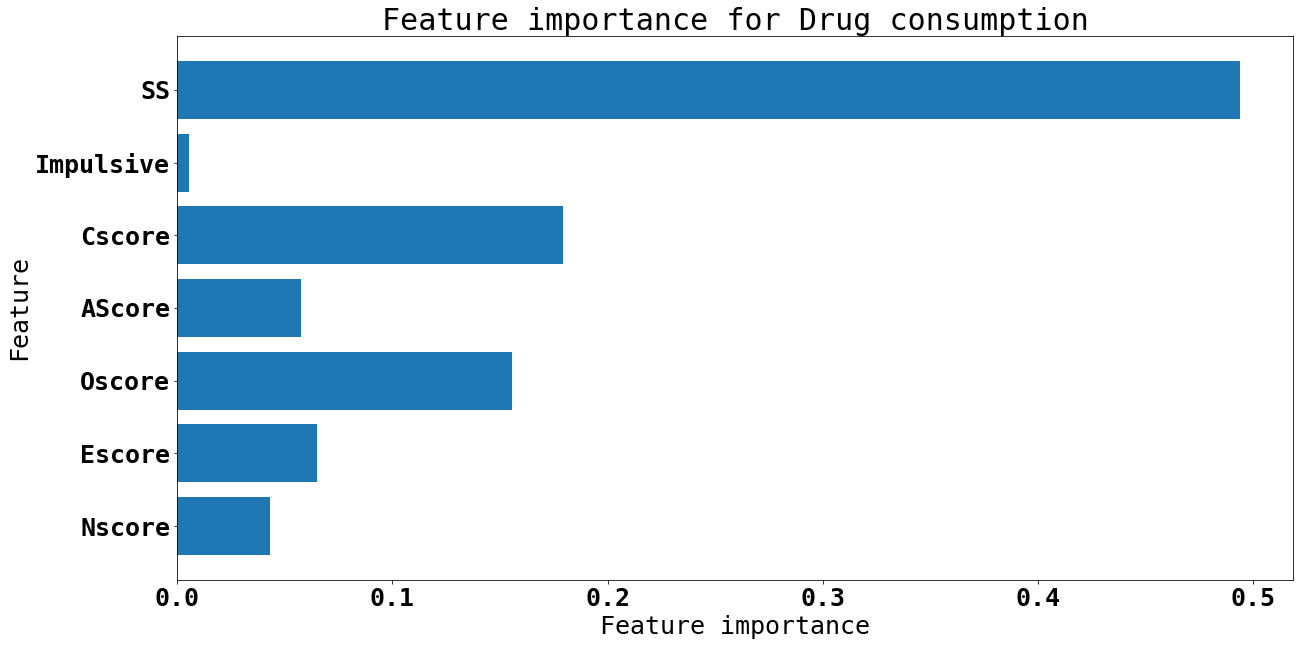

In [82]:
gbrt001 = GradientBoostingClassifier(random_state=0, learning_rate=0.001)
gbrt001.fit(X_train, y_train)
plot_feature_importances(gbrt001)

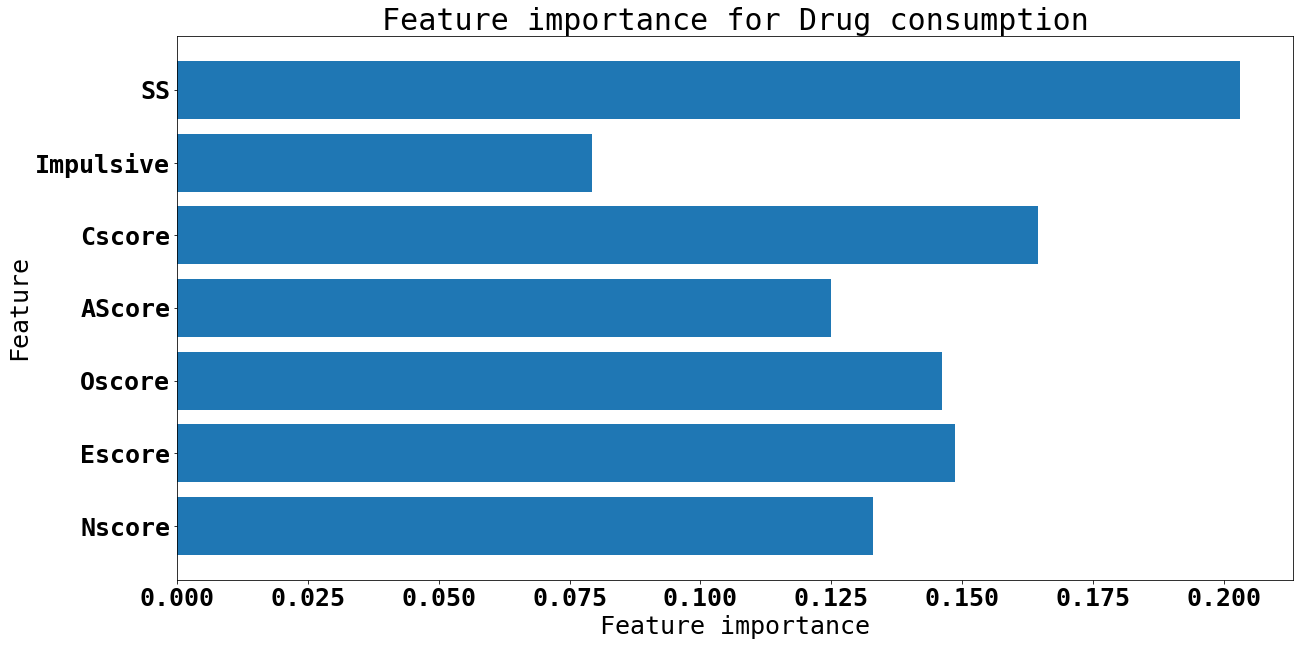

In [83]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
plot_feature_importances(gbrt)

After manual optimization for one of the default parameters (5 different values of learning ) for GradientBoostingClassifier models make changes to the coefficients of the different features

## One multiclass classification model for all the rest 16 features

In [84]:
#Amyl
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y_amyl, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.672


In [85]:
#Benzene

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y_Ben, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.968
Accuracy on test set: 0.522


In [86]:
#Caff

X_train, X_test, y_train, y_test = train_test_split(X,y_Caff, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))



Accuracy on training set: 0.984
Accuracy on test set: 0.678


In [87]:
#Cannabis

X_train, X_test, y_train, y_test = train_test_split(X,y_Can, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.978
Accuracy on test set: 0.333


In [88]:
#Coke
X_train, X_test, y_train, y_test = train_test_split(X,y_Coke, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.972
Accuracy on test set: 0.554


In [89]:
#Crack

X_train, X_test, y_train, y_test = train_test_split(X,y_Crack, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.851


In [90]:
#Ecstasy

X_train, X_test, y_train, y_test = train_test_split(X,y_Ecstasy, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.971
Accuracy on test set: 0.542


In [91]:
#Heroin

X_train, X_test, y_train, y_test = train_test_split(X,y_Heroin, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.975
Accuracy on test set: 0.849


In [92]:
#Ketamine
X_train, X_test, y_train, y_test = train_test_split(X,y_Ketamine, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.968
Accuracy on test set: 0.789


In [93]:
#Legalh
X_train, X_test, y_train, y_test = train_test_split(X,y_Leg, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.571


In [94]:
#LSD

X_train, X_test, y_train, y_test = train_test_split(X,y_LSD, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.531


In [95]:
#Meth

X_train, X_test, y_train, y_test = train_test_split(X,y_Meth, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.733


In [96]:
#Mushrooms

X_train, X_test, y_train, y_test = train_test_split(X,y_Mush, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.972
Accuracy on test set: 0.469


In [97]:
#Nicotine

X_train, X_test, y_train, y_test = train_test_split(X,y_Nic, random_state=42)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.273


RandomForestClassifier model is well fitted for the  #Crack #Heroin #Ketamine #Meth

# Binary Classification

Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:

one class (class 0) the variable "Never Used" and "Used in Last Decade" and the remaining variables for the other class (class 1).
one class (class 0) the variables "Never Used", "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
one class (class 0) the variables "Never Used", "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
Comment your results, and point which selection of classes have better accuracy.

0=CL0 Never Used 
1=CL1 Used over a Decade Ago 
2=CL2 Used in Last Decade 
3=CL3 Used in Last Year 
4=CL4 Used in Last Month 
5=CL5 Used in Last Week 
6=CL6 Used in Last Day 

In [98]:
#create binary classification for alcohol variable
df.loc[(df['Alcohol'] == 0) | (df['Alcohol'] == 2),'N_Alcohol'] = 0
df.loc[(df.Alcohol == 1) | (df.Alcohol == 3) | (df.Alcohol == 4)| (df.Alcohol == 5) | (df.Alcohol == 6)| (df.Alcohol == 7),'N_Alcohol'] = 1

In [99]:
df.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,N_Alcohol
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,...,4,0,2,0,2,3,0,4,0,1.0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,...,0,0,0,0,0,0,1,0,0,1.0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,...,0,0,2,0,0,0,0,2,0,1.0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,...,1,0,0,1,0,0,2,2,0,1.0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,...,0,0,0,0,0,0,0,7,0,0.0


In [100]:
df=df.astype({'N_Alcohol': 'int64'})
df

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,N_Alcohol
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,...,4,0,2,0,2,3,0,4,0,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,...,0,0,2,0,0,0,0,2,0,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,...,1,0,0,1,0,0,2,2,0,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,...,0,0,0,0,0,0,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,6,0,0,...,0,0,0,3,3,0,0,0,6,1
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,6,0,0,...,2,0,0,3,6,4,4,6,0,1
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,7,6,...,4,0,2,0,2,0,2,7,0,1
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,6,0,0,...,3,0,0,3,3,0,3,4,0,1


In [101]:
#create binary classification for Amphetvariable
df.loc[(df['Amphet'] == 0) | (df['Amphet'] == 2)|(df['Amphet'] == 3) ,'N_Amphet'] = 0
df.loc[(df.Amphet== 1) |  (df.Amphet == 4)| (df.Amphet == 5) | (df.Amphet== 6)| (df.Amphet == 7),'N_Amphet'] = 1

In [102]:
df.dropna(axis='columns')

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,N_Alcohol,N_Amphet
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,...,0,2,0,2,3,0,4,0,1,0.0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,...,0,0,0,0,0,1,0,0,1,0.0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,...,0,2,0,0,0,0,2,0,1,0.0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,...,0,0,1,0,0,2,2,0,1,1.0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,...,0,0,0,0,0,0,7,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,6,0,0,...,0,0,3,3,0,0,0,6,1,0.0
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,6,0,0,...,0,0,3,6,4,4,6,0,1,0.0
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,7,6,...,0,2,0,2,0,2,7,0,1,1.0
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,6,0,0,...,0,0,3,3,0,3,4,0,1,0.0


In [103]:
df=df.astype({'N_Amphet': 'int64'})
df

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,N_Alcohol,N_Amphet
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,...,0,2,0,2,3,0,4,0,1,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,...,0,0,0,0,0,1,0,0,1,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,...,0,2,0,0,0,0,2,0,1,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,...,0,0,1,0,0,2,2,0,1,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,...,0,0,0,0,0,0,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,6,0,0,...,0,0,3,3,0,0,0,6,1,0
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,6,0,0,...,0,0,3,6,4,4,6,0,1,0
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,7,6,...,0,2,0,2,0,2,7,0,1,1
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,6,0,0,...,0,0,3,3,0,3,4,0,1,0


In [104]:
#create binary classification for  Amyl variable
df.loc[(df['Amyl'] == 0) | (df['Amyl'] == 2)|(df['Amyl'] == 3)|(df['Amyl'] == 4) ,'N_Amyl'] = 0
df.loc[(df.Amyl== 1)| (df.Amyl == 5) | (df.Amyl== 6)| (df.Amyl == 7),'N_Amyl'] = 1

In [105]:
df.dropna(axis='columns')

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,N_Alcohol,N_Amphet,N_Amyl
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,...,2,0,2,3,0,4,0,1,0,0.0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,...,0,0,0,0,1,0,0,1,0,0.0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,...,2,0,0,0,0,2,0,1,0,0.0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,...,0,1,0,0,2,2,0,1,1,1.0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,...,0,0,0,0,0,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,6,0,0,...,0,3,3,0,0,0,6,1,0,0.0
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,6,0,0,...,0,3,6,4,4,6,0,1,0,0.0
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,7,6,...,2,0,2,0,2,7,0,1,1,1.0
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,6,0,0,...,0,3,3,0,3,4,0,1,0,0.0


In [106]:
df=df.astype({'N_Amyl': 'int64'})
df

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,N_Alcohol,N_Amphet,N_Amyl
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,6,2,2,...,2,0,2,3,0,4,0,1,0,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,7,0,0,...,0,0,0,0,1,0,0,1,0,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,...,2,0,0,0,0,2,0,1,0,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,...,0,1,0,0,2,2,0,1,1,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,...,0,0,0,0,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,6,0,0,...,0,3,3,0,0,0,6,1,0,0
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,6,0,0,...,0,3,6,4,4,6,0,1,0,0
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,7,6,...,2,0,2,0,2,7,0,1,1,1
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,6,0,0,...,0,3,3,0,3,4,0,1,0,0


In [107]:
df=df.loc[:,['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS','N_Alcohol','N_Amphet','N_Amyl']]

In [108]:
df

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,N_Alcohol,N_Amphet,N_Amyl
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1,0,0
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1,0,0
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,1,1
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1,0,0


In [109]:
df.iloc[:,:7] 


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...
1871,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1872,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1873,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1874,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [110]:
df.iloc[:,9]

0       0
1       0
2       0
3       1
4       0
       ..
1871    0
1872    0
1873    1
1874    0
1875    0
Name: N_Amyl, Length: 1876, dtype: int64

In [111]:
# Split df into X and y
X = df.iloc[:,:7].values  
y_alc = df.iloc[:,7].values#Alcohol
y_amp = df.iloc[:,8].values#Amphetamine
y_aml = df.iloc[:,9].values#Amyl

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y_alc, random_state=42)
#logreg = LogisticRegression().fit(X_train, y_train)
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.945
Test set score: 0.951


In [113]:
logreg100 = LogisticRegression(C=100,max_iter=1000,solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

#LogisticRegression?

Training set score: 0.945
Test set score: 0.951


In [114]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.945
Test set score: 0.951


In [115]:
names = list(df.columns)
print(names)
X_names = names[:7]
print(X_names)

['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'N_Alcohol', 'N_Amphet', 'N_Amyl']
['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']


In [116]:
# Logistic Regression with L2 regularization

def plot_lg_l2():
    plt.plot(logreg.coef_.T, 'o', label="C=1")
    plt.plot(logreg100.coef_.T, '^', label="C=100")
    plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
    plt.xticks(range(len(X_names)), X_names, rotation=90)
    plt.hlines(0, 0,len(X_names))
    plt.ylim(-5, 2)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.legend()

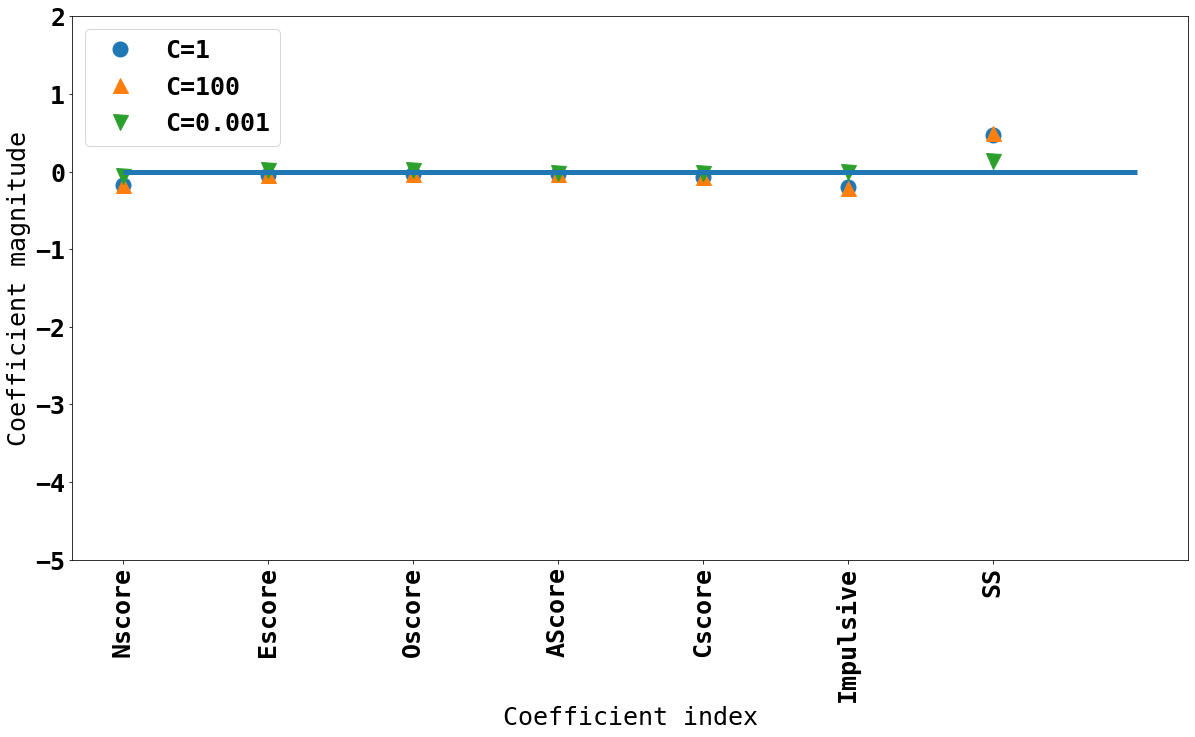

In [117]:
plot_lg_l2()

In [118]:
# Logistic Regression with L1 regularization

def plot_lg_l1():
    for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
        lr_l1 = LogisticRegression(C=C, penalty="l1",solver='liblinear').fit(X_train, y_train)
        #print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            #C, lr_l1.score(X_train, y_train)))
        #print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            #C, lr_l1.score(X_test, y_test)))
        plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

    plt.xticks(range(len(X_names)), X_names, rotation=90)
    plt.hlines(0, 0, len(X_names))
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 3)
    plt.legend(loc=3)

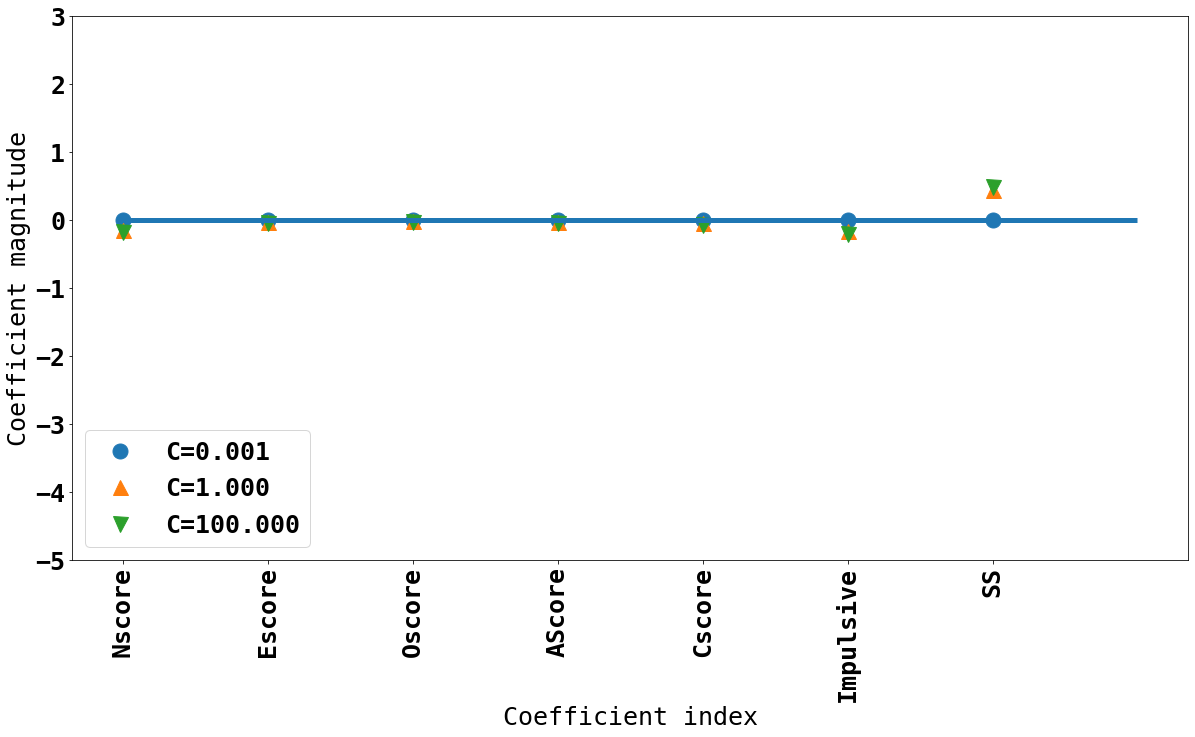

In [119]:
plot_lg_l1()

# Amphetamine

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y_amp, random_state=42)
#logreg = LogisticRegression().fit(X_train, y_train)
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.751
Test set score: 0.757


#### k-Neighbors for classification

In [121]:
from sklearn.model_selection import train_test_split

#train_test_split?

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y_amp, random_state=66)

In [123]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [124]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

KNeighborsClassifier?

Test set accuracy: 0.73


## Amyl 

#### Decision Trees

In [125]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y_aml, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.755


#### Task 3 (5 points): 

Data normalization

* Look at features of Linnerud dataset, explore them and tell what is the problem with these
          `from sklearn.datasets import load_linnerud` 

* Normalize these features using a correct method. Plot original vs normalized probability density and comment your results.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets


In [127]:
from sklearn.datasets import load_linnerud
dataset = load_linnerud()
X_full, y_full = dataset.data, dataset.target

In [128]:
X,y=load_linnerud(return_X_y=True)

In [129]:
df1 = pd.DataFrame(X, columns=['Chins', 'Situps', 'Jumps'])
df1.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [130]:
df2 = pd.DataFrame(y, columns=['Weight', 'Waist', 'Pulse'])
df2.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [131]:
df=pd.merge(df1,df2,left_index=True, right_index=True)
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [132]:
X = df.iloc[:,:5].values  
y = df.iloc[:,5].values#Alcohol

In [133]:
X

array([[  5., 162.,  60., 191.,  36.],
       [  2., 110.,  60., 189.,  37.],
       [ 12., 101., 101., 193.,  38.],
       [ 12., 105.,  37., 162.,  35.],
       [ 13., 155.,  58., 189.,  35.],
       [  4., 101.,  42., 182.,  36.],
       [  8., 101.,  38., 211.,  38.],
       [  6., 125.,  40., 167.,  34.],
       [ 15., 200.,  40., 176.,  31.],
       [ 17., 251., 250., 154.,  33.],
       [ 17., 120.,  38., 169.,  34.],
       [ 13., 210., 115., 166.,  33.],
       [ 14., 215., 105., 154.,  34.],
       [  1.,  50.,  50., 247.,  46.],
       [  6.,  70.,  31., 193.,  36.],
       [ 12., 210., 120., 202.,  37.],
       [  4.,  60.,  25., 176.,  37.],
       [ 11., 230.,  80., 157.,  32.],
       [ 15., 225.,  73., 156.,  33.],
       [  2., 110.,  43., 138.,  33.]])

In [134]:
y

array([50., 52., 58., 62., 46., 56., 56., 60., 74., 56., 50., 52., 64.,
       50., 46., 62., 54., 52., 54., 68.])

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(15, 5)
(5, 5)


In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [137]:
# transform train data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("\n")
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("\n")
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (15, 5)


per-feature minimum before scaling:
 [  1.  50.  31. 138.  31.]
per-feature maximum before scaling:
 [ 17. 251. 250. 247.  46.]


per-feature minimum after scaling:
 [0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1.]


In [138]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.1875      0.04975124 -0.02739726  0.22018349  0.2       ]
per-feature maximum after scaling:
[1.         0.34825871 0.3196347  0.66972477 0.46666667]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

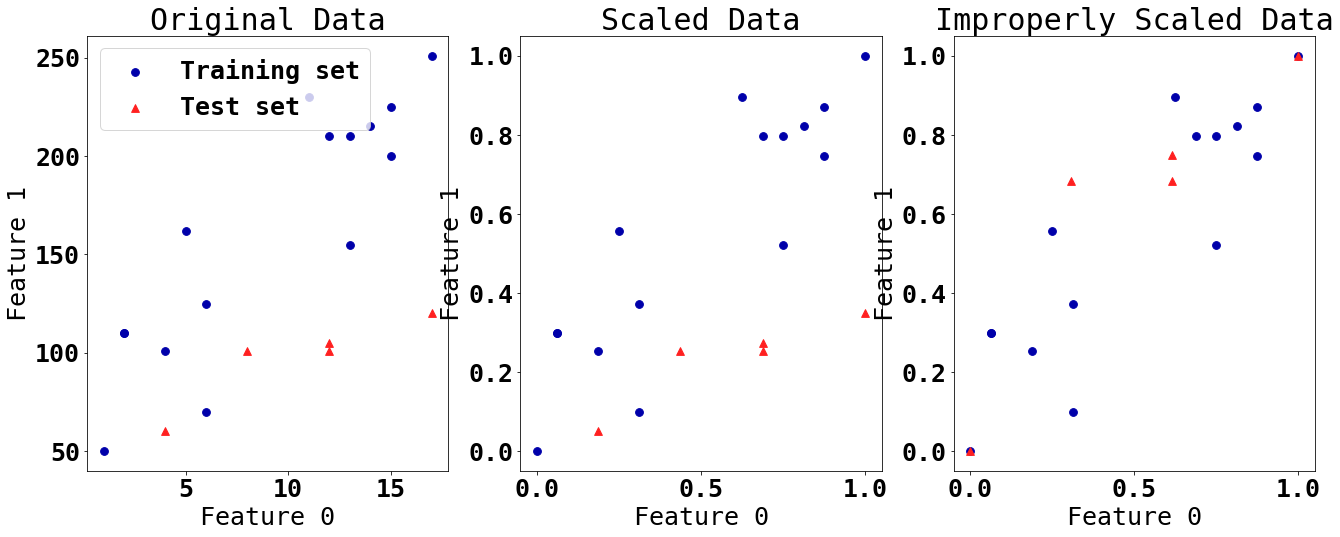

In [139]:
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
        c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
        c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
        c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
        c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
        c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
        marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

# Task 4

#### Task 4 ( 10 points):  
Dimensionality reduction and clustering

* Load the 20 News Dataset
          `from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')`
          
* Use KernelPCA for dimensionality reduction. Train a classifier at different number (at least 5 values) of dimensions, check how model score changes as a function of the number of dimensions dimensions. 
    
          Remember that you can load training and testing subsets of data instead of the whole dataset!
          
* Cluster 20 News Dataset into 20 clusters for at least 2 for two of the reduced data obtained in the previous point. Print true class vs cluster distribution. Did you manage to recover the original clusters? Describe and comment your results.

In [21]:
from sklearn.datasets import fetch_20newsgroups_vectorized
#load the dataset
data = fetch_20newsgroups_vectorized(subset='train')
# seperate features and the study variable
X, y = data.data, data.target

In [22]:
from sklearn.model_selection import train_test_split# model for splitting the data
# we split 80% of the data for model training and 20% accuracy model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Scalling the features
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train



<8485x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1343269 stored elements in Compressed Sparse Row format>

In [24]:
y

array([17,  7, 10, ..., 14, 12, 11])

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.44


In [26]:
from sklearn.decomposition import KernelPCA
Kernel_pca = KernelPCA(n_components = 2, kernel= "rbf")# extracts 2 features, specify the kernel as rbf
# transform and fit the feature of the training set
X_train_kpca = Kernel_pca.fit_transform(X_train)
# transform features of the test set
X_test_kpca = Kernel_pca.transform(X_test)
print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_train_kpca.shape)))

Original shape: (8485, 130107)
Reduced shape: (8485, 2)


In [27]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_kpca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_kpca, y_test)))

Test set accuracy: 0.07


In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_kpca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_kpca, y_test)))

Test set accuracy: 0.07


In [29]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_kpca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_kpca, y_test)))

Test set accuracy: 0.06


In [30]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_kpca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_kpca, y_test)))

Test set accuracy: 0.06


In [31]:

# another way
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA(n_components = 2, kernel= "rbf")# extracts 2 features, specify the kernel as rbf
# transform and fit the feature of the training set
X_train_kpca = Kernel_pca.fit_transform(X_train)
# transform features of the test set
X_test_kpca = Kernel_pca.transform(X_test)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_kpca, y_test)))

Test set accuracy: 0.06


In [32]:
#Fit Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_kpca, y_train)


LogisticRegression(random_state=0)

In [33]:
#Predict the Test set results
y_pred = classifier.predict(X_test_kpca)

In [42]:
#Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


In [157]:
#data

{'data': <11314x130107 sparse matrix of type '<class 'numpy.float64'>'
 	with 1787565 stored elements in Compressed Sparse Row format>,
 'target': array([17,  7, 10, ..., 14, 12, 11]),
 'frame': None,
 'target_names': ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 'feature_names': array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
       dtype=object),
 'DESCR': '.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand

### Cluster 20 News Dataset into 20 clusters 

In [3]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc']

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

11314 documents - 20 categories


In [4]:
from collections import defaultdict
from sklearn import metrics
from time import time

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(dataset.data)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 1.390 s
n_samples: 11314, n_features: 17797


In [6]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

0.003


In [7]:
from sklearn.cluster import KMeans

for seed in range(20):
    kmeans = KMeans(
        n_clusters=20,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements asigned to each cluster: [ 518  473  943  180  552  264  472   94  587  338  446  450  181  120
  214  260  414 3735  244  829]
Number of elements asigned to each cluster: [    1 11267     1     2     2     1     8     1    10     2     1     1
     8     2     1     1     1     1     1     2]
Number of elements asigned to each cluster: [    1     1     1     1 11270     1     3     1     1     2     1     1
    10     1    10     1     1     2     1     4]
Number of elements asigned to each cluster: [    2     1     1 11283     1     1     1     1     1     2     3     1
     1     1     5     1     5     1     1     1]
Number of elements asigned to each cluster: [   2    1    2    3    1    1    1    1    1   18    1    1    1 2456
    1   53    1 8766    1    2]
Number of elements asigned to each cluster: [    2     1     1     1 11170     2     8     1     1    71     1     2
     1     1     2     1    35     1     1    11]
Number of elements asigned to each clu

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=20,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")

clustering done in 31.84 ± 13.49 s 
Homogeneity: 0.250 ± 0.105
Completeness: 0.395 ± 0.052
V-measure: 0.281 ± 0.105
Adjusted Rand-Index: 0.063 ± 0.029
Silhouette Coefficient: 0.005 ± 0.003


In [9]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 1.489 s
Explained variance of the SVD step: 11.6%


In [10]:
kmeans = KMeans(
    n_clusters=20,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.18 ± 0.03 s 
Homogeneity: 0.337 ± 0.014
Completeness: 0.369 ± 0.013
V-measure: 0.352 ± 0.013
Adjusted Rand-Index: 0.150 ± 0.012
Silhouette Coefficient: 0.060 ± 0.003


### Clustering evaluation summary

In [11]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(20):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :20]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: window motif server using use widget application code program problem display running sun x11r5 set run mit manager does available 
Cluster 1: thanks advance know mail hi does info help looking email anybody information appreciated post like appreciate interested use address wondering 
Cluster 2: edu university cs email david send colorado computer uiuc just mail mit com pub cc internet know thanks virginia info 
Cluster 3: don people think know just say things time really like good make ve want way going didn right years thing 
Cluster 4: just com does good new ve mail know time looking did want got use software email ll sure make address 
Cluster 5: 00 50 sale 20 price shipping new 10 15 30 dos interested 25 condition card cover asking 40 information edu 
Cluster 6: car space power just new used problem use time good way high engine nasa cars probably long years work 10 
Cluster 7: drive drives hard disk scsi floppy ide controller cd boot computer new hd rom tape internal 

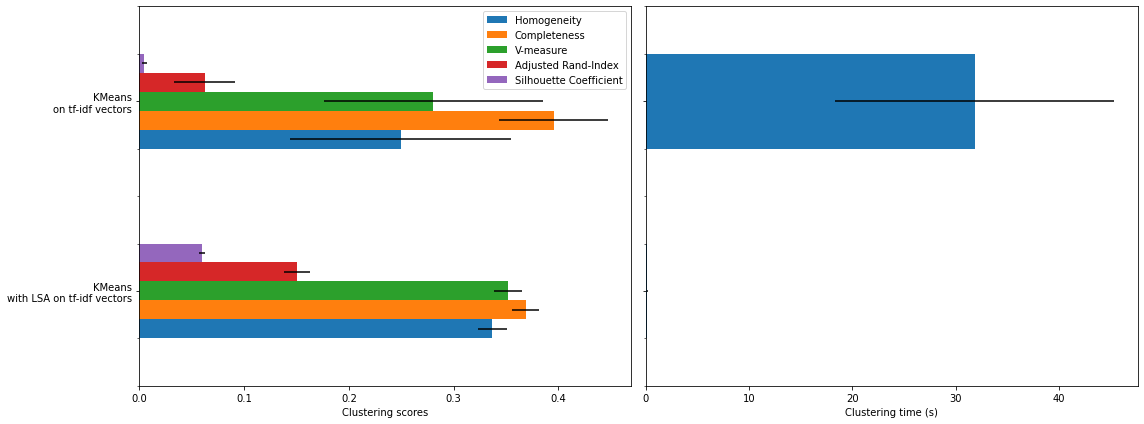

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

categories = ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc']


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:

        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [14]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

11314 documents - 22.05MB (training set)
7532 documents - 13.80MB (test set)
20 categories
vectorize training done in 2.355s at 9.365MB/s
n_samples: 11314, n_features: 25631
vectorize testing done in 1.286s at 10.735MB/s
n_samples: 7532, n_features: 25631


In [15]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)

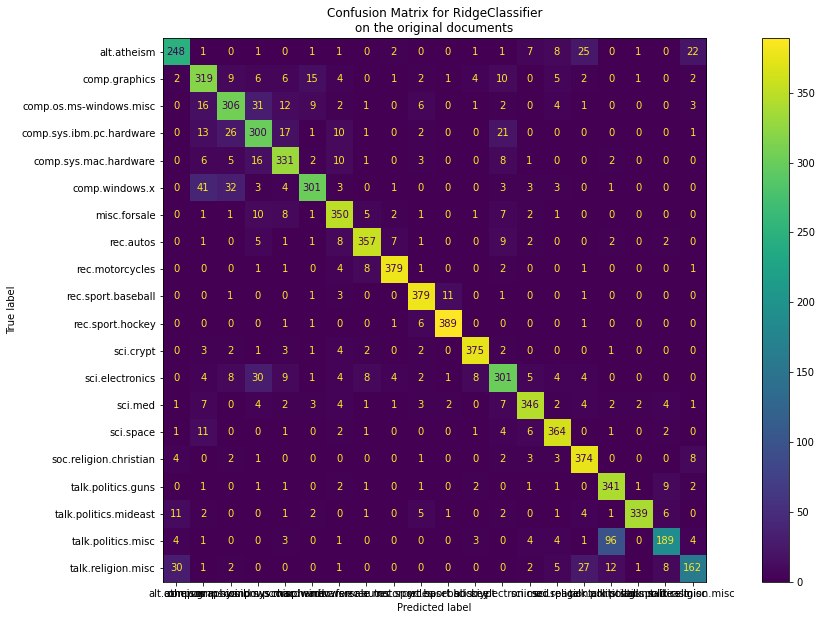

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)

top 5 keywords per class:
  alt.atheism comp.graphics comp.os.ms-windows.misc comp.sys.ibm.pc.hardware  \
0       keith      graphics                 windows                     help   
1         god         image                    file                   thanks   
2    atheists          need                     win                      com   
3     article      computer                     use                       pc   
4     atheism            3d                  driver                     card   

  comp.sys.mac.hardware comp.windows.x  misc.forsale rec.autos  \
0                   mac         window          sale       car   
1                 apple          motif  distribution       com   
2                    se         server        wanted      cars   
3                  does            sun           new   article   
4                 drive            mit         offer       usa   

  rec.motorcycles rec.sport.baseball rec.sport.hockey   sci.crypt  \
0             dod          

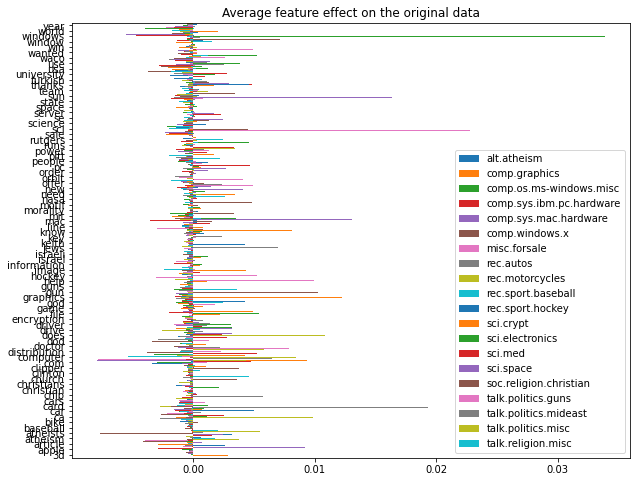

In [17]:
import pandas as pd
import numpy as np


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

In [18]:
from sklearn.utils.extmath import density
from sklearn import metrics


def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier


results = []
for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (RidgeClassifier(alpha=1.0, solver="sparse_cg"), "Ridge Classifier"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    # L2 penalty Linear SVC
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    # L2 penalty Linear SGD
    (
        SGDClassifier(
            loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True
        ),
        "log-loss SGD",
    ),
    # NearestCentroid (aka Rocchio classifier)
    (NearestCentroid(), "NearestCentroid"),
    # Sparse naive Bayes classifier
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Logistic Regression
________________________________________________________________________________
Training: 
LogisticRegression(C=5, max_iter=1000)
train time: 23.8s
test time:  0.0186s
accuracy:   0.847
dimensionality: 25631
density: 1.0


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sparse_cg')
train time: 2.45s
test time:  0.0185s
accuracy:   0.856
dimensionality: 25631
density: 1.0


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=100)
train time: 0.0s
test time:  4.61s
accuracy:   0.765

Random Forest
________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 23.8s
test time:  0.605s
accuracy:   0.776

Linear SVC
________________________________________________________________________________
Training: 
LinearSVC(C=0.1, dual=False)
train time:

ValueError: The loss log_loss is not supported. 

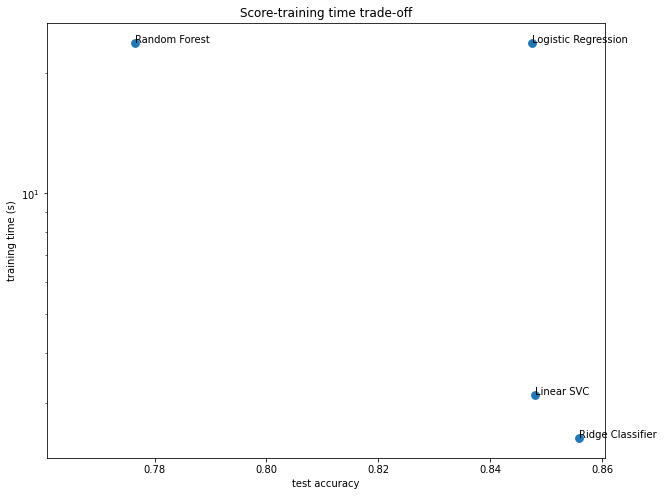

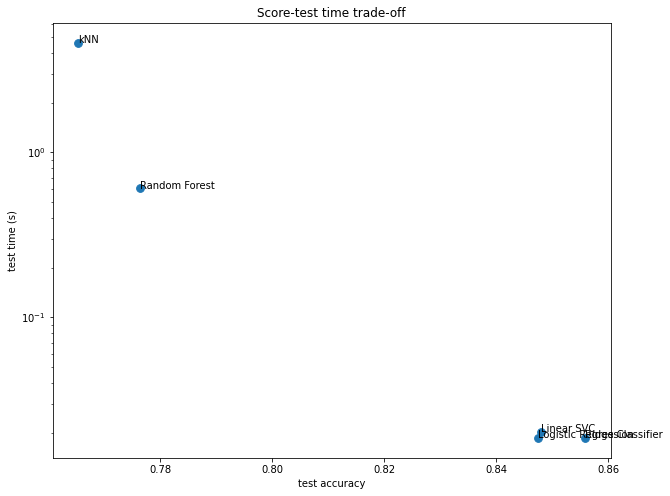

In [20]:
ndices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time)
test_time = np.array(test_time)

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(score, training_time, s=60)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(score, test_time, s=60)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))